<a href="https://colab.research.google.com/github/tianhanl0/fall2022-homework-2/blob/main/Modern_Programming_for_Data_Analytics_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern Programming for Data Analytics
Name: Tianhan Ling

Andrew ID: tianhanl

# Exercise - GeoIP
a. Install the package [ip2geotools](https://pypi.org/project/ip2geotools/) and [Faker](https://pypi.org/project/Faker/) using `pip`.

In [14]:
!pip install ip2geotools
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 5.1 MB/s 
     |████████████████████████████████| 843 kB 30.5 MB/s 
     |████████████████████████████████| 507 kB 77.2 MB/s 
     |████████████████████████████████| 103 kB 88.9 MB/s 
     |████████████████████████████████| 330 kB 96.9 MB/s 
     |████████████████████████████████| 98 kB 7.5 MB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 
     |████████████████████████████████| 985 kB 78.0 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 78 kB 9.1 MB/s 
     |████████████████████████████████| 829 kB 86.0 MB/s 
     |████████████████████████████████| 263 kB 71.9 MB/s 
     |████████████████████████████████| 41 kB 514 kB/s 
     |████████████████████████████████| 62 kB 2.1 MB/s 
     |████████████████████████████████| 140 kB 75.5 MB/s 
     |████████████████████████████████| 358 k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 15.4 MB/s 


b. Use `Faker` to generate a list of 50 random [IPv4](https://faker.readthedocs.io/en/master/providers/faker.providers.internet.html#) addresses. Instructions to generate these random values can be found in the documentation.

**Hint**
* Set seed to `123`, i.e. 
```
seed = 123
Faker.seed( seed )
```

In [17]:
from faker import Faker

seed = 50
fake = Faker()
Faker.seed(123)
rand_ip = []
for _ in range(seed):
  x = fake.ipv4()
  print(x)
  rand_ip.append(x)


69.148.119.107
184.135.155.222
66.113.28.21
53.66.186.34
35.82.91.82
109.101.61.75
2.251.12.26
110.250.252.82
188.21.65.166
84.48.122.209
179.67.226.131
210.247.237.99
136.20.121.156
160.86.251.136
59.143.144.240
144.251.7.225
17.45.0.94
186.253.164.90
15.186.53.151
103.66.212.88
91.204.253.194
159.28.220.35
14.182.65.179
34.9.176.26
168.92.232.248
178.164.189.58
216.97.97.96
109.100.2.48
2.75.12.188
188.103.172.196
149.130.195.46
69.164.94.120
174.232.122.188
86.133.192.241
198.231.221.48
8.244.163.142
159.170.119.148
194.238.249.97
5.107.180.42
111.28.171.243
61.133.223.234
72.159.96.134
16.172.26.156
122.208.254.75
155.203.14.118
128.5.210.97
68.1.200.61
9.107.173.234
64.140.68.81
166.10.18.67


c. Use `ip2geotools` to get information about the IPs. Use the method `get` from `DbIpCity`. Read the [documentation](https://pypi.org/project/ip2geotools/) on how to properly use the method. 

* The responses should be save to a list named `responses`.

**Hint**
* Set the `api_key` to `free`.
* Export the response from the get method to a JSON block using the method `to_json`.

In [18]:
from ip2geotools.databases.noncommercial import DbIpCity
responses = rand_ip
for ipr in responses:
  i = DbIpCity.get(ipr, api_key='free')
  print(i.to_json())

{"ip_address": "69.148.119.107", "city": "Plano", "region": "Texas", "country": "US", "latitude": 33.0136764, "longitude": -96.6925096}
{"ip_address": "184.135.155.222", "city": "Chicago", "region": "Illinois", "country": "US", "latitude": 41.8755616, "longitude": -87.6244212}
{"ip_address": "66.113.28.21", "city": "Colorado Springs", "region": "Colorado", "country": "US", "latitude": 38.8339578, "longitude": -104.825348}
{"ip_address": "53.66.186.34", "city": "Stuttgart (Untert\u00fcrkheim)", "region": "Baden-W\u00fcrttemberg", "country": "DE", "latitude": 48.7798209, "longitude": 9.2504725}
{"ip_address": "35.82.91.82", "city": "Portland", "region": "Oregon", "country": "US", "latitude": 45.5202471, "longitude": -122.674194}
{"ip_address": "109.101.61.75", "city": "Bucharest (Sector 1)", "region": "Bucure\u0219ti", "country": "RO", "latitude": 44.416123, "longitude": 26.08021346945351}
{"ip_address": "2.251.12.26", "city": "Malmo", "region": "Sk\u00e5ne", "country": "SE", "latitude":

d. Data cleanup. Some the responses have empty fields for `latitude` and `longitude`. Remove the entries from the list that are missing either of these values.

**Hint**
* If the latitude and longitude are missing, then the value of either of these is set to `None`.

In [5]:
for ipr in responses:
  i = DbIpCity.get(ipr, api_key='free')
  x = i.to_json()
  print(x["latitude"])

TypeError: ignored

d. Save variables to disk. Use [pickle](https://docs.python.org/3/library/pickle.html) to serialize the variable `responses`. Save the pickle file to the course folder in your Google Drive in a file named `ips.pkl`. 

In [ ]:
type(rand_ip[0])

str

This section will make a plot using the data above but will fail for missing data. So make sure the data is clean. Nothing to do here.

**Hint**
* If the plot is printed, then you are good to do. Keep in mind the shape of `responses`: it is a list of strings that needs to converted to JSON.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

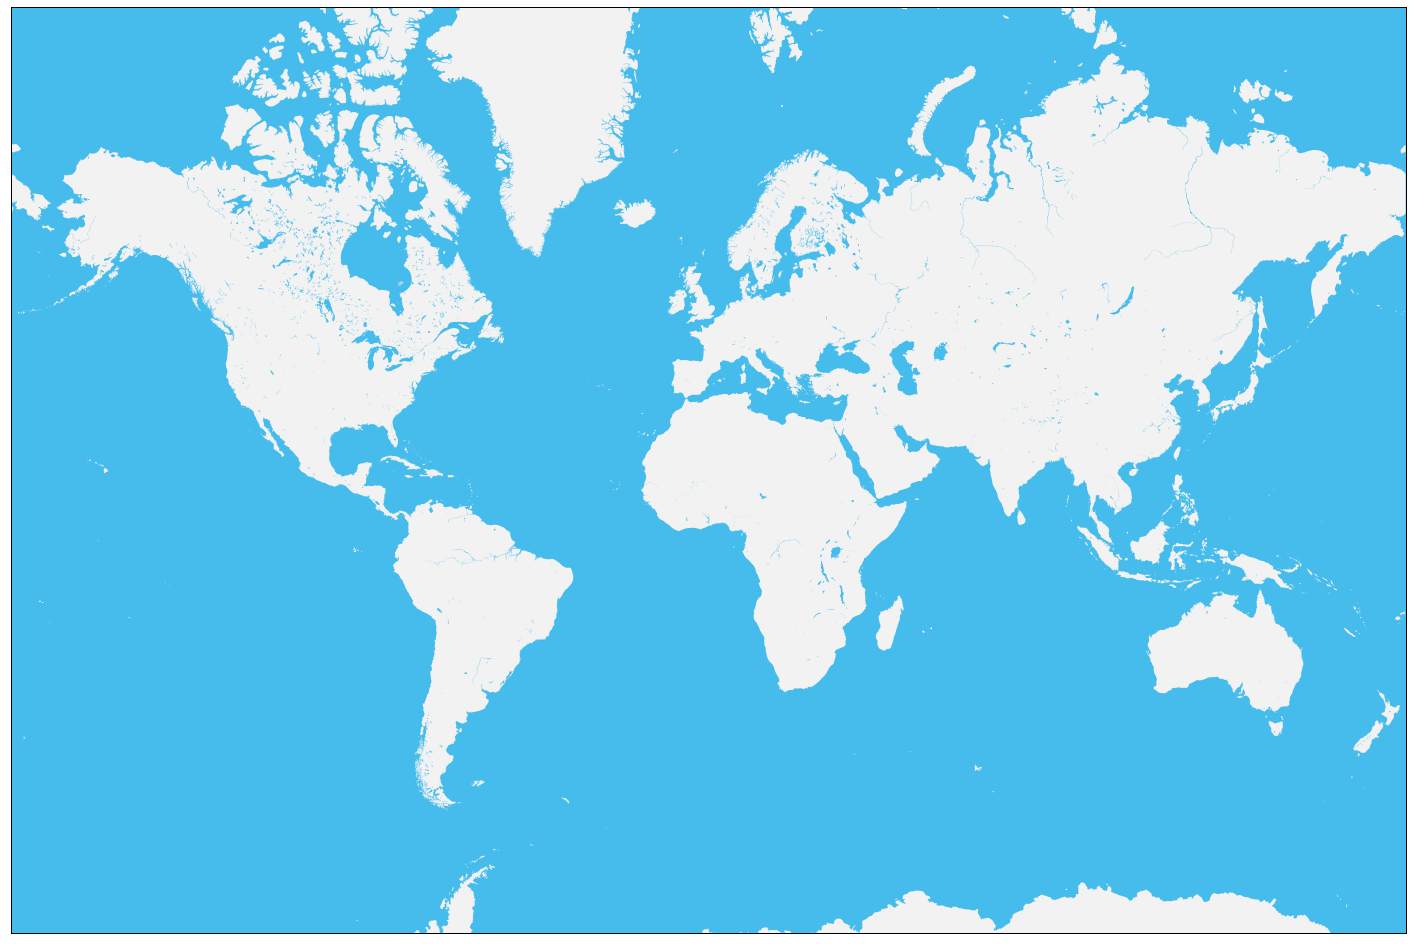

In [ ]:
# DO NOT MODIFY THIS BLOCK
!pip install basemap
!pip install basemap-data-hires

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm
import math
import json
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(25,25))
m = Basemap(resolution='i', # c, l, i, h, f or None
	projection='merc',
	lat_1=45.,lat_2=55,lat_0=50,lon_0=-107,
		llcrnrlon=-180, llcrnrlat=-70, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='#45bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')

scale = 0.1
for response in responses:
    response = json.loads(response)

    if not response['longitude'] == None:
      lon = response['longitude']
      lat = response['latitude']
      markerSize = scale*response['longitude']
      x, y = m(lon,lat)
      plt.plot(x, y, markersize = markerSize, color = 'red', marker = 'o')

plt.show()

## Exercise - Random sampling
Numpy has a very robust library for sampling from random distributions. For a detailed list of discrete and continuous distributions that can be sampled from, see the [documentation](https://numpy.org/doc/stable/reference/random/index.html).

For example, sampling from an exponential distribution can be achieved with

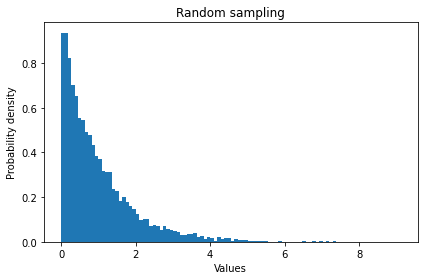

In [1]:
# DO NOT EDIT THIS CELL
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

#this line is sampling from an exponential distribution
elambda = 1
values = np.random.exponential(scale=elambda, size=10000)

num_bins = 100
fig, ax = plt.subplots()
n, bins, patches = ax.hist(values, num_bins, density=True)
ax.set_xlabel('Values')
ax.set_ylabel('Probability density')
ax.set_title(r'Random sampling')
fig.tight_layout()

plt.show()

a. Inverse Transform Sampling. The inverse CDF method is a widely documented method for generating random samples.

In this exercise you will use this method to sample from an exponential distribution with parameter `lambda=1`.

Since this is a widely documented method, part of this exercise includes finding the method and implementing it yourself.

* Set `lambda=1`.
* Generate `10000` samples.
* Save the samples to a variable named `samples`.

**Hint**
* This is not complicated, you should be able to write this in a couple of lines.
* Feel free to use online resources like StackOverFlow.

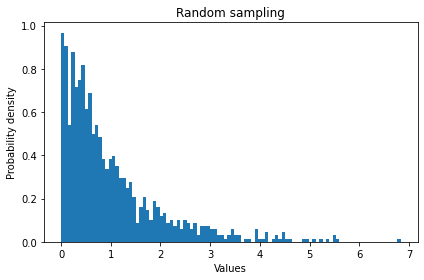

In [10]:
# INSERT CODE IN THIS CELL
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

elambda = 1
U=np.random.uniform(size= 1000)
X=-elambda*np.log(1-U)

num_bins=100
fig, ax = plt.subplots()
n, bins, patches = ax.hist(X, num_bins, density=True)
ax.set_xlabel('Values')
ax.set_ylabel('Probability density')
ax.set_title(r'Random sampling')
fig.tight_layout()
plt.show()

# Exercise - SIR model
The SIR model is a simple mathematical model of epidemics. The entities in this model stand for

* (S)usceptible: inviduals that are not infected with the disease yet. However, they are not immune to it either, and so they can become infected with the disease in the future.
* (I)nfected or infectious: individuals that are infected with the disease and can transmit the disease to susceptible people.
* (R)ecovered: individuals who have recovered from the disease and are immune, so they can no longer be infected.

In the most basic form, this model model can be represented as

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c2a8fd2e93bfcf1092a44cfec7ef32c1a80a26f4" />

where 

* β is the average number of contacts per person per time
* γ is the probability a contagious person becoming non-contagious
* N is the population size (constant)

Consider the numerical solution below using the parameters

* `beta = 0.2`
* `gamma = 0.07`
* `N = 100`
* `S0 = 99`
* `I0 = 1`
* `R0 = 0`





In [40]:
# DO NOT MODIFY THIS BLOCK
!pip install numpy
!pip install scipy

import numpy as np
from scipy.integrate import odeint

# Model
def model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Parameters
N = 100
beta = 0.2
gamma = 0.07
S_0 = 99
I_0 = 1
R_0 = 0
t = np.linspace(0, 360, 360)

# Initial conditions vector
y0 = (S_0,I_0,R_0)

# Solve using ODE solver
results = odeint(model, y0, t, args=(N,beta,gamma))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Pretty plot
Use matplotlib and seaborn to make a figure. 

* The figure size should `25x25`
* The figure should have one plot with three lineplots, `t vs S`, `t vs I` and `t vs R`.
* Set title to `SIR model`.
* Set x-label to `Time (t)`.
* Set y-label to `Population size`.
* Make sure each line plot uses different colors.

In [41]:
t = t.tolist()
S = results[:,0].tolist()
I = results[:,1].tolist()
R = results[:,2].tolist()

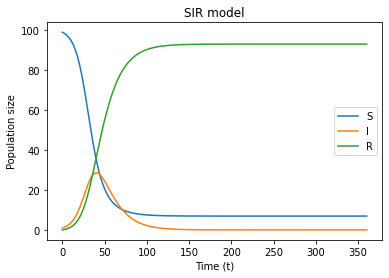

In [46]:
import matplotlib
import matplotlib.pyplot as plt

fig = matplotlib.pyplot.gcf()
plt.plot(t,S, label = "S")
plt.plot(t,I, label = "I")
plt.plot(t,R, label = "R")
plt.title("SIR model")
plt.xlabel("Time (t)")
plt.ylabel("Population size")
plt.legend()
plt.show()
fig.savefig('sir.png', dpi=100)

## Save plot to disk
Save the plot above to the course folder in your Google Drive to a file named `sir.png`. 

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
save = '/content/drive/My Drive/38610'
plt.savefig(f"{save}/sir.png")

<Figure size 432x288 with 0 Axes>

# Exercise - Matrix multiplication using `numpy` (updated edition).

Design an implement a method called `can_be_multiplied`. 

* Use only the standard libary and `numpy`.
* This method takes two Numpy arrays and returns True if these two matrices can be multiplied. False, otherwise.
* Work on the assumption that if the input arguments are `a` and `b` (in that order), then the operation `a*b` will be checked by this method and not `b*a`.
* If the input argument is not a Numpy array, then the method should return `None`.
* **NEW**. If any of the arrays is a Numpy array, then check that the `dtype` of these arrays is numeric.
* **NEW**. If any of the arrays is empty, then issue a warning message letting the user know which of the arrays is empty.
* Write docstrings for this method.
* Write at least 6 assertions to test your method.

**Hint**
* Test for empty matrices. If any of the matrices are empty, then this method should return `False`.

In [77]:
import numpy as np
import warnings


def can_be_multiplied(a, b):
  '''
  Helper method that determine whether two matrix can be nultiplied
  if not matrix return None

  :param a: object 
  :type matrix: numpy.array
  :param b: object
  :type matrix: numpy.array
  :rtype answer: boolean or None
  '''
  if type(a) == np.ndarray and type(b) == np.ndarray:
    if a.size == 0:
      warnings.warn('matrix a is empty')
      return False
    if b.size == 0:
      warnings.warn('matrix b is empty')
      return False
#    for i in range(len(a)):
#      for j in a[i]: # 'numpy.int64' object is not iterable
#        if np.issubdtype(np.dtype(j), np.number) == False:
#          return False
#    for i in range(len(b)):
#      for j in b[i]:
#        if np.issubdtype(np.dtype(j), np.number) == False:
#          return False
    try:
      if a.shape[1] == b.shape[0]:
        return True
      else:
        return False
    except:
      if a.shape[0] == b.shape[0]:
        return True
      else:
        return False
  else:
    return None

assert can_be_multiplied([1,2,3],[2,3,4]) == None
assert can_be_multiplied(np.array([[1,2,3],[2,3,4]]), np.array([[1,2],[3,4],[5,6]])) == True
assert can_be_multiplied(np.array([1,2,3]), np.array([[1,2],[3,4],[5,6]])) == True
assert can_be_multiplied(np.array([1,2,3]), np.array([[1,2,3],[3,4,5],[5,6,7],[7,8,9]])) == False
assert can_be_multiplied(np.array([1,2,3]), np.array([[1,2,3],[3,4,5]])) == False
#assert can_be_multiplied(np.array([[1,2,'a'],[2,3,4]]), np.array([[1,2],[3,4],[5,6]])) == False
assert can_be_multiplied(np.array([]), np.array([[1,2],[3,4],[5,6]])) == False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: matrix a is empty


In [73]:
a = np.array([[1,2,3],[2,3,4]])
for i in range(len(a)):
  for j in a[i]:
    if np.issubdtype(np.dtype(j), np.number) == False:
      print(False)

In [80]:
can_be_multiplied(np.array([]), np.array([[1,2],[3,4],[5,6]]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: matrix a is empty


False